In [5]:
# 1. import the necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import seaborn as sns


In [6]:
# 2. load the dataset
df = pd.read_csv("../data/Iris.csv")
print(df.head())
print(df.info())
print(df["Species"].value_counts())


   Id  SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm      Species
0   1            5.1           3.5            1.4           0.2  Iris-setosa
1   2            4.9           3.0            1.4           0.2  Iris-setosa
2   3            4.7           3.2            1.3           0.2  Iris-setosa
3   4            4.6           3.1            1.5           0.2  Iris-setosa
4   5            5.0           3.6            1.4           0.2  Iris-setosa
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB
None
Species
Iris-se

In [7]:
#3. Preprocessing (Drop Unnecessary Columns, Normalize Features)

# Drop Id column
df.drop("Id", axis=1, inplace=True)

# Features and labels
X = df.drop("Species", axis=1)
y = df["Species"]

# Normalize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [8]:
# 4. Train-Test Split

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

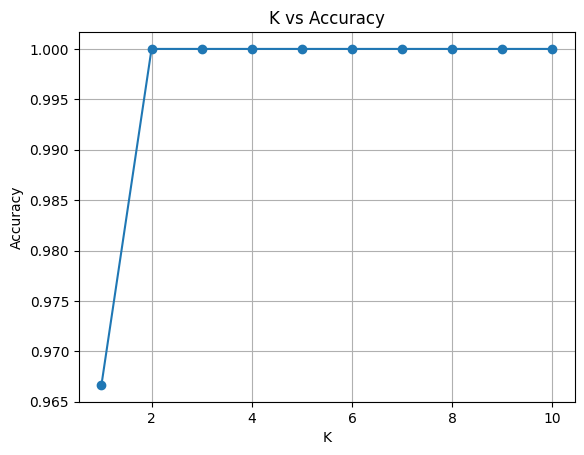

In [9]:
# 5. Train KNN Model with Different K Values

k_range = range(1, 11)
accuracies = []

for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    accuracies.append(acc)

# Plot
plt.plot(k_range, accuracies, marker='o')
plt.title('K vs Accuracy')
plt.xlabel('K')
plt.ylabel('Accuracy')
plt.grid(True)
plt.show()

In [10]:
#6. Evaluate Best K

best_k = k_range[np.argmax(accuracies)]
print("Best K =", best_k)

knn = KNeighborsClassifier(n_neighbors=best_k)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)

print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

Best K = 2
Confusion Matrix:
 [[10  0  0]
 [ 0  9  0]
 [ 0  0 11]]

Classification Report:
                  precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        10
Iris-versicolor       1.00      1.00      1.00         9
 Iris-virginica       1.00      1.00      1.00        11

       accuracy                           1.00        30
      macro avg       1.00      1.00      1.00        30
   weighted avg       1.00      1.00      1.00        30



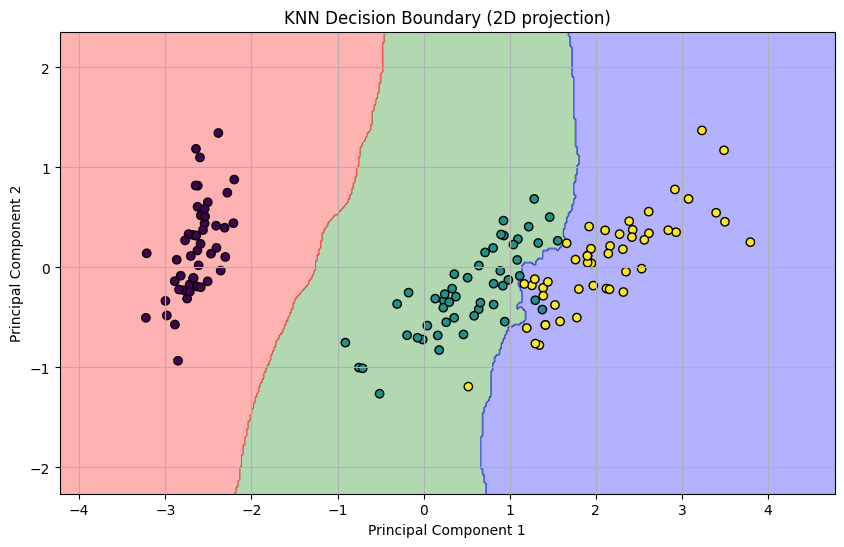

In [12]:
#7. Visualize Decision Boundaries (2D Projection)
from matplotlib.colors import ListedColormap

# Encode target labels
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
y_encoded = le.fit_transform(y)

# PCA projection to 2D
from sklearn.decomposition import PCA
X_proj = PCA(n_components=2).fit_transform(X)

# Fit KNN model
model = KNeighborsClassifier(n_neighbors=5)
model.fit(X_proj, y_encoded)

# Create meshgrid
h = .02
x_min, x_max = X_proj[:, 0].min() - 1, X_proj[:, 0].max() + 1
y_min, y_max = X_proj[:, 1].min() - 1, X_proj[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))

# Predict on grid
Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# Plot decision boundary
plt.figure(figsize=(10, 6))
plt.contourf(xx, yy, Z, cmap=ListedColormap(('red', 'green', 'blue')), alpha=0.3)
plt.scatter(X_proj[:, 0], X_proj[:, 1], c=y_encoded, edgecolor='k')
plt.title("KNN Decision Boundary (2D projection)")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.grid(True)
plt.show()

